In [1]:
%run flow_tools-Copy1.py

/opt/homebrew/Caskroom/miniforge/base/envs/flow/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from matplotlib.path import Path
from matplotlib import patches

In [3]:
folders = ['/Users/weinberz/Library/CloudStorage/Box-Box/BadIdea/Flow/20240507 - Minibinder Expression/']

In [6]:
df = [load_data(folder, colnames = ['WellName', 'Construct', 'Stain', 'CellType', 'Replicate']) for folder in folders]
df = pd.concat(df)

In [7]:
#remove all rows with values less than 0
df2= df.loc[(df.select_dtypes(include=['number']) > 0).all(axis='columns'), :]

#remove all rows with missing values
df2= df2.dropna()

In [8]:
#define gate for FSC-A vs SSC-A
fsc_ssc_verts = [(4e4, 1e4),
              (1e5, 2.5e4),
              (2.5e5, 1e5),
              (2.5e5, 2.5e5),
              (1e5, 2.5e5),
              (4e4, 5e4),
              (4e4, 5e4),
              (4e4, 1e4)]
fsc_ssc_gate = Path(fsc_ssc_verts)

ssc_verts = [(0, 1e4),
              (2e5, 1.8e5),
              (2.6e5, 1.8e5),
              (2.5e5, 1.3e5),
              (1.25e5, 7.5e4),
              (1e4, 0),
              (0, 1e4)]
ssc_gate = Path(ssc_verts)

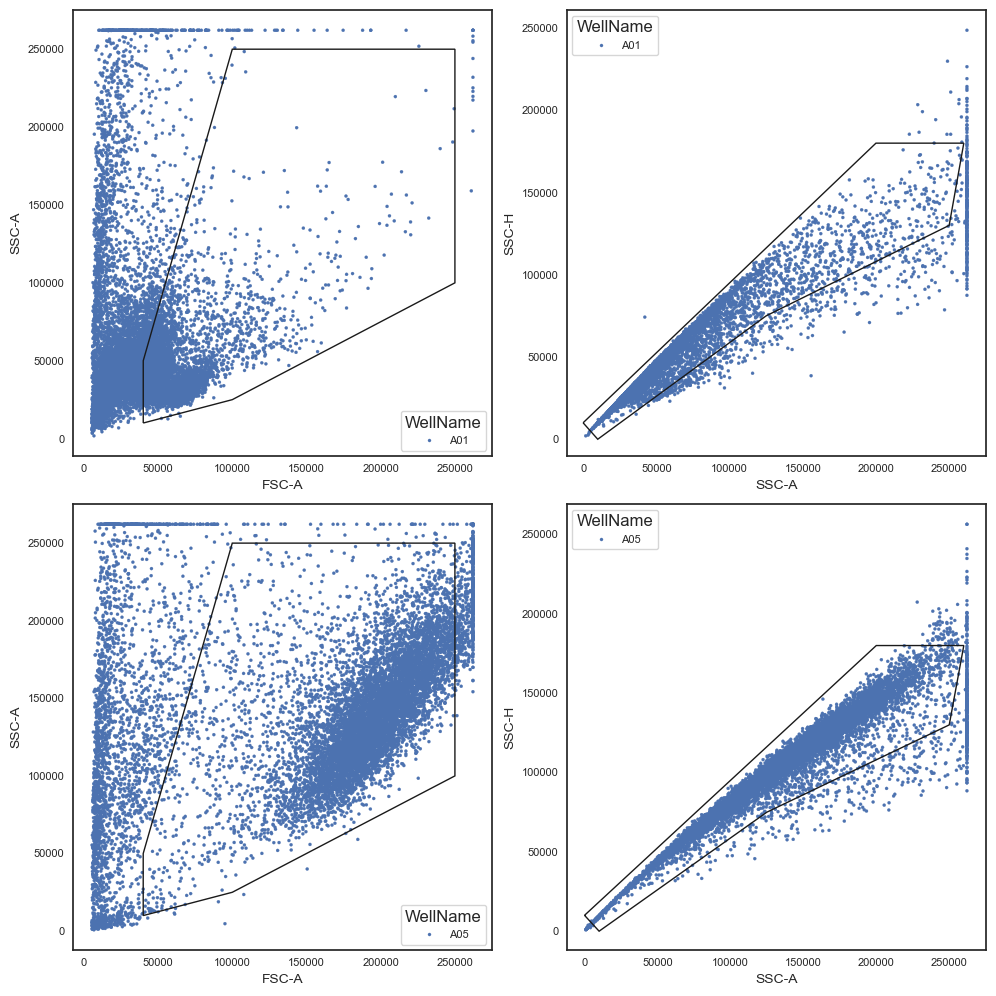

In [10]:
fig, axs = plt.subplots(2,2, figsize=[10,10])
sns.scatterplot(data=df2[(df2['WellName'].isin(['A01']))], x='FSC-A', y='SSC-A', marker='o', s=5, edgecolors=None, ax=axs[0,0], hue='WellName')
sns.scatterplot(data=df2[df2['WellName'].isin(['A01'])], x='SSC-A', y='SSC-H', marker='o', s=5, edgecolors=None, ax=axs[0,1], hue='WellName')
sns.scatterplot(data=df2[df2['WellName'].isin(['A05'])], x='FSC-A', y='SSC-A', marker='o', s=5, edgecolors=None, ax=axs[1,0], hue='WellName')
sns.scatterplot(data=df2[df2['WellName'].isin(['A05'])], x='SSC-A', y='SSC-H', marker='o', s=5, edgecolors=None, ax=axs[1,1], hue='WellName')
patch = patches.PathPatch(fsc_ssc_gate, facecolor="None", edgecolor='k')
axs[0,0].add_patch(patch)
patch = patches.PathPatch(fsc_ssc_gate, facecolor="None", edgecolor='k')
axs[1,0].add_patch(patch)
patch = patches.PathPatch(ssc_gate, facecolor="None", edgecolor='k')
axs[0,1].add_patch(patch)
patch = patches.PathPatch(ssc_gate, facecolor="None", edgecolor='k')
axs[1,1].add_patch(patch)
plt.tight_layout()

In [11]:
#filter to gate
df2 = df2[fsc_ssc_gate.contains_points(df2[['FSC-A','SSC-A']].to_numpy())]
df2 = df2[ssc_gate.contains_points(df2[['SSC-A', 'SSC-H']].to_numpy())]
# # gate on singlets
# df2 = gate_density(df2, 0.1, x_var='SSC-A',y_var='SSC-H')

for col in df2.columns:
        if df2[col].dtype=="float32":
            df2["log"+ col]=df2[col].apply(math.log10)

In [12]:
effector_order = ['Untransduced','P2224-CAR', 'EGFRn-CAR', 'EGFRc-CAR']
target_order = ['Untransduced', 'EGFR+']

In [30]:
expression_df = (df2[(df2['CellType']=='Effector') & 
                     (df2['Stain']=='Myc')]
                 .groupby(['Construct','Replicate'])['APC-A']
                 .median()
                 .reset_index())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


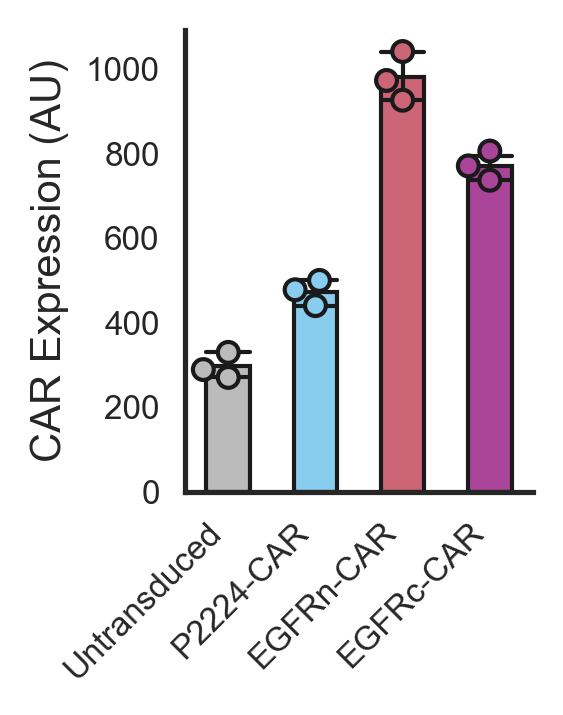

In [33]:
with sns.color_palette([grey, "#88ccee", "#cc6677", "#aa4499"]):
    fig, ax = plt.subplots(1,1,figsize=(1.5,2), dpi=300)
    g = sns.swarmplot(data=expression_df, x='Construct', y='APC-A', hue='Construct',
                  order=effector_order,
                  hue_order=effector_order, 
                  edgecolor='k', linewidth=1)
    sns.barplot(data=expression_df, x='Construct', y='APC-A', hue='Construct',
                  order=effector_order,
                  hue_order=effector_order, 
            dodge=False, edgecolor='k', capsize=0.5, width=0.5, saturation=1,
                estimator='mean',
            err_kws={'linewidth': 1, 'color':'k'})
    g.legend().remove()
    g.set_ylabel('CAR Expression (AU)')
    g.set_xlabel('')
    plt.xticks(rotation=45, ha='right')
    sns.despine()
    plt.savefig(outputdir+'egfr-effector-expression.pdf', bbox_inches='tight')

In [24]:
expression_df = (df2[(df2['CellType']=='Target') & 
                     (df2['Stain']=='EGFR')]
                 .groupby(['Construct','Replicate'])['BV 750-A']
                 .median()
                 .reset_index())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


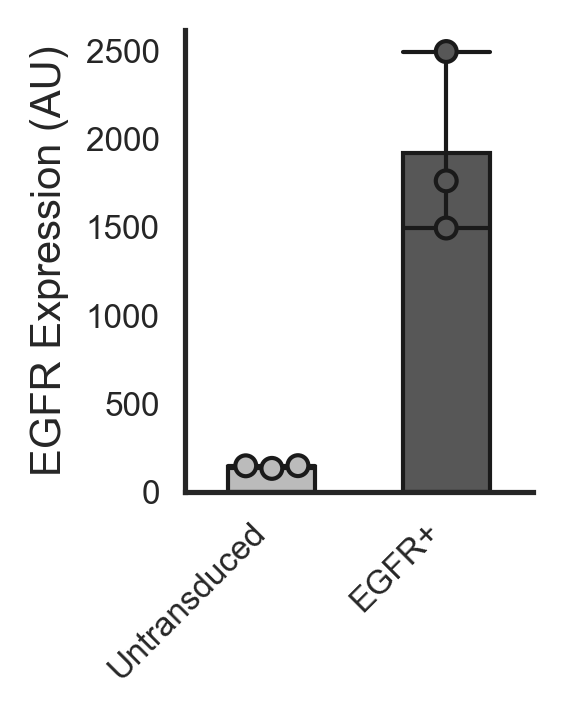

In [26]:
with sns.color_palette([grey, "#575757"]):
    fig, ax = plt.subplots(1,1,figsize=(1.5,2), dpi=300)
    g = sns.swarmplot(data=expression_df, x='Construct', y='BV 750-A', hue='Construct',
                  order=target_order,
                  hue_order=target_order, 
                  edgecolor='k', linewidth=1)
    sns.barplot(data=expression_df, x='Construct', y='BV 750-A', hue='Construct',
                  order=target_order,
                  hue_order=target_order, 
            dodge=False, edgecolor='k', capsize=0.5, width=0.5, saturation=1,
                estimator='mean',
            err_kws={'linewidth': 1, 'color':'k'})
    g.legend().remove()
    g.set_ylabel('EGFR Expression (AU)')
    g.set_xlabel('')
    plt.xticks(rotation=45, ha='right')
    sns.despine()
    plt.savefig(outputdir+'egfr-target-expression.pdf', bbox_inches='tight')